In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from  sklearn import metrics 
import seaborn as sns
import random as rnd
%matplotlib inline

In [134]:
df=pd.read_excel("file:///C:/Users/P4/Desktop/Dataset.xlsx")

In [135]:
df.head(4)

,Date,Revenue,Impressions
0,2016-05-10 08:00:00,1756.272321,3239965
1,2016-05-11 08:00:00,1721.217273,3076574
2,2016-05-12 08:00:00,1655.175643,2779677
3,2016-05-13 08:00:00,1724.210998,2938450


In [136]:
data=df[["Date","Revenue"]].drop_duplicates()

In [137]:
data.head(4)

,Date,Revenue
0,2016-05-10 08:00:00,1756.272321
1,2016-05-11 08:00:00,1721.217273
2,2016-05-12 08:00:00,1655.175643
3,2016-05-13 08:00:00,1724.210998


In [138]:
data.columns

Index(['Date', 'Revenue'], dtype='object')

In [139]:
data.Revenue.describe()

count    1095.000000
mean     2600.961226
std       703.779394
min      1298.198889
25%      2085.851992
50%      2464.886545
75%      2920.411834
max      5551.418559
Name: Revenue, dtype: float64

In [140]:
data.Revenue.fillna(data.Revenue.mean(),inplace=True)

In [141]:
data.isnull().sum()

Date       0
Revenue    0
dtype: int64

# DETECTION D'ANOMALIE DE LA VALEUR ACTUELLE DE REVENUE

In [253]:
#specify the 12 metrics column names to be modelled
to_model_columns=data.columns[1:21]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)


In [143]:
clf.fit(data[to_model_columns])


C:\Users\P4\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.12,
        max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
        random_state=42, verbose=0)

In [144]:
pred = clf.predict(data[to_model_columns])
data['anomaly']=pred


C:\Users\P4\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [145]:
pred

array([ 1,  1, -1, ...,  1,  1,  1])

In [146]:
outliers=data.loc[data['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(data['anomaly'].value_counts())

 1    963
-1    132
Name: anomaly, dtype: int64


In [147]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [148]:
data.head(4)

,Date,Revenue,anomaly
0,2016-05-10 08:00:00,1756.272321,1
1,2016-05-11 08:00:00,1721.217273,1
2,2016-05-12 08:00:00,1655.175643,-1
3,2016-05-13 08:00:00,1724.210998,1


In [149]:
data=data[["Date","Revenue"]].drop_duplicates()

In [150]:
data.set_index('Date',inplace=True)

In [151]:
data.head(4)

,Revenue
Date,
2016-05-10 08:00:00,1756.272321
2016-05-11 08:00:00,1721.217273
2016-05-12 08:00:00,1655.175643
2016-05-13 08:00:00,1724.210998


In [152]:
outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Revenue,132.0,3464.605437,1271.359588,1298.198889,1669.980044,3827.40805,4341.257532,5551.418559
anomaly,132.0,-1.000000,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000


In [254]:
outliers.head(5)

,Date,Revenue,anomaly
2,2016-05-12 08:00:00,1655.175643,-1
27,2016-06-06 08:00:00,1662.083477,-1
70,2016-07-19 08:00:00,1542.003770,-1
71,2016-07-20 08:00:00,1604.118941,-1
173,2016-10-30 07:00:00,3627.766839,-1


# REVENUE-FORECAST , ANOMALIES-FORECAST BY ARIMA-FORECASTING , CONTROL CHART

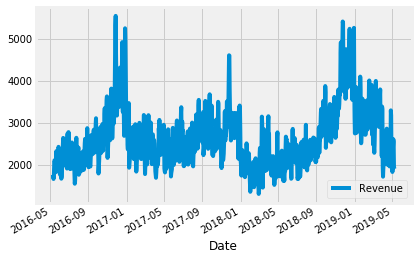

In [153]:
data.plot()

In [154]:
timeseries = data['Revenue']

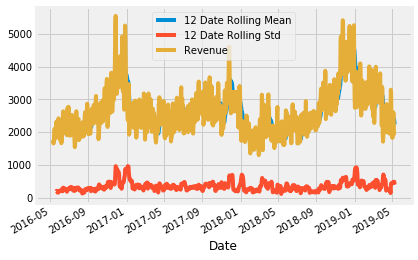

In [155]:
timeseries.rolling(12).mean().plot(label='12 Date Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Date Rolling Std')
timeseries.plot()
plt.legend()

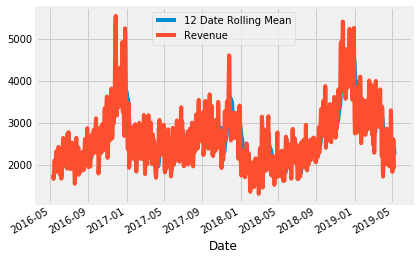

In [156]:
timeseries.rolling(12).mean().plot(label='12 Date Rolling Mean')
timeseries.plot()
plt.legend()

<Figure size 432x288 with 0 Axes>

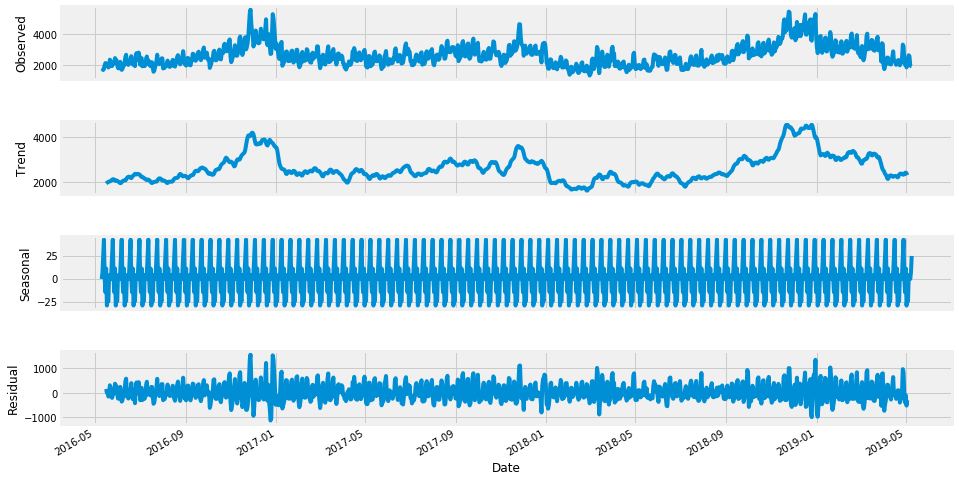

In [157]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Revenue'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [158]:
from statsmodels.tsa.stattools import adfuller

In [159]:
result = adfuller(data['Revenue'])

In [160]:
result

(-3.0447070562765672,
 0.030925041065422754,
 21,
 1073,
 {'1%': -3.436459052172655,
  '5%': -2.864237372528562,
  '10%': -2.568206176974609},
 14847.07569133016)

In [161]:


print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")



Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0447070562765672
p-value : 0.030925041065422754
#Lags Used : 21
Number of Observations Used : 1073
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [162]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [163]:
data['Revenue'] = data['Revenue'] - data['Revenue'].shift(1)

In [164]:
adf_check(data['Revenue'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.107647217773541
p-value : 1.2502912454150175e-12
#Lags Used : 20
Number of Observations Used : 1073
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


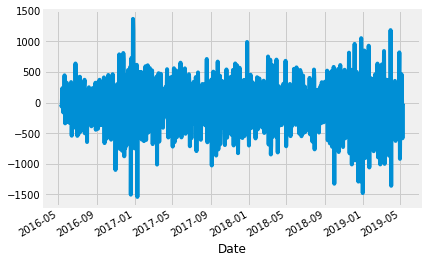

In [165]:
data['Revenue'].plot()

In [166]:
# Sometimes it would be necessary to do a second difference 
# This is just for show, we didn't need to do a second difference in our case
data['Revenue'] = data['Revenue'] - data['Revenue'].shift(1)

In [104]:
adf_check(data['Revenue'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -16.21953352195025
p-value : 3.9108110322261997e-29
#Lags Used : 19
Number of Observations Used : 1073
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


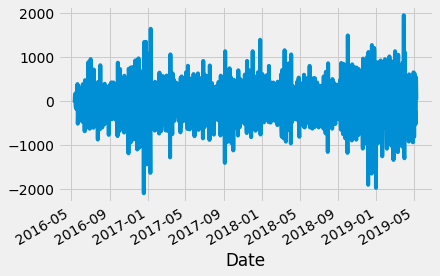

In [105]:
data['Revenue'].plot()

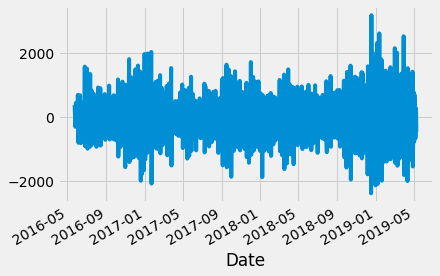

In [106]:
data['Revenue'] = data['Revenue'] - data['Revenue'].shift(12)
data['Revenue'].plot()

In [107]:
# Seasonal Difference by itself was not enough!
adf_check(data['Revenue'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.72284508311679
p-value : 9.442800514478974e-17
#Lags Used : 22
Number of Observations Used : 1058
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


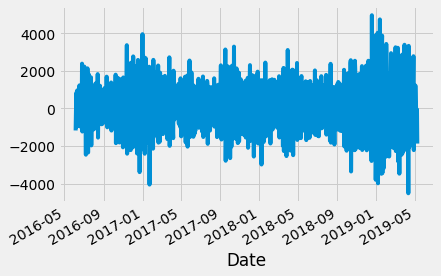

In [108]:
# You can also do seasonal first difference
data['Revenue'] = data['Revenue'] - data['Revenue'].shift(12)
data['Revenue'].plot()

In [109]:
adf_check(data['Revenue'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.569516114488579
p-value : 8.270394645667225e-14
#Lags Used : 22
Number of Observations Used : 1046
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [110]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

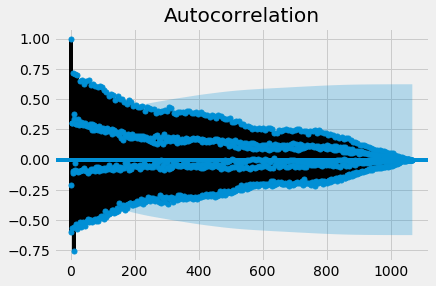

In [111]:
# Duplicate plots
# Check out: https://stackoverflow.com/questions/21788593/statsmodels-duplicate-charts
# https://github.com/statsmodels/statsmodels/issues/1265
fig_first = plot_acf(data['Revenue'].dropna())

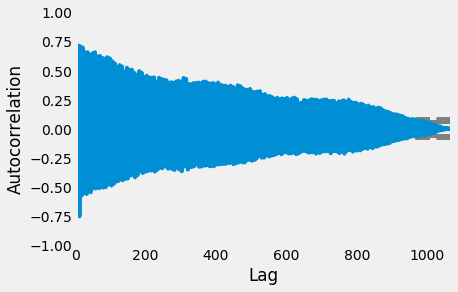

In [112]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Revenue'].dropna())

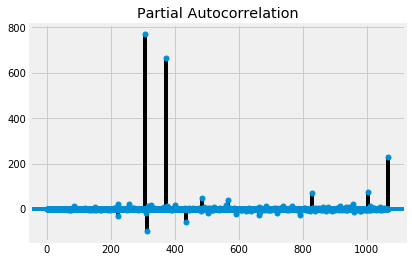

In [57]:
result = plot_pacf(data['Revenue'].dropna())

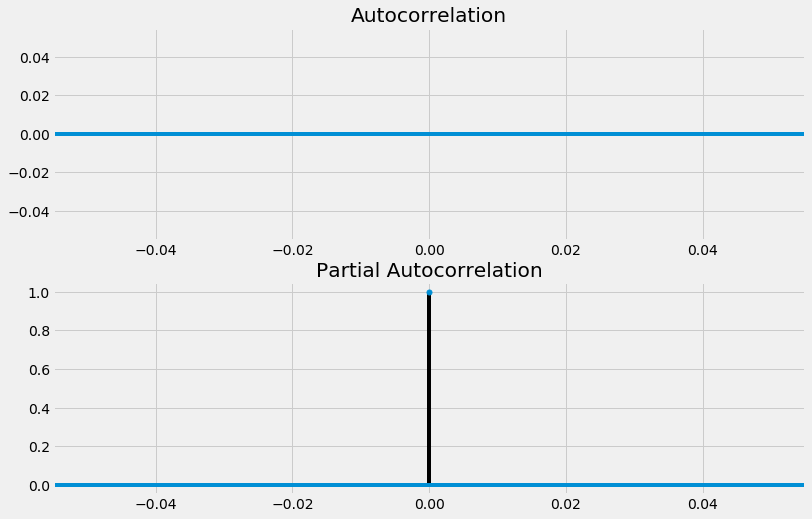

In [113]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Revenue'].iloc[13:], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Revenue'].iloc[13:], lags=40, ax=ax2)

# ARIMA FORECASTING

In [114]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [128]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(data['Revenue'],order=(0,1,1), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\P4\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                            Revenue   No. Observations:                 1095
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -8831.835
Date:                            Fri, 17 May 2019   AIC                          17671.670
Time:                                    19:24:32   BIC                          17691.616
Sample:                                         0   HQIC                         17679.222
                                           - 1095                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     15.885     -0.063      0.950     -32.134      30.134
ar.S.L12      -0.7446      0.020   

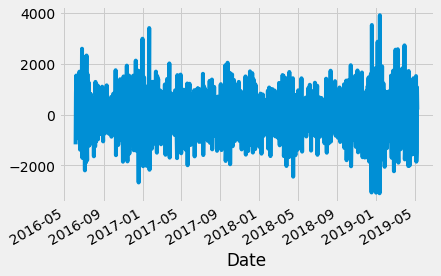

In [129]:
results.resid.plot()

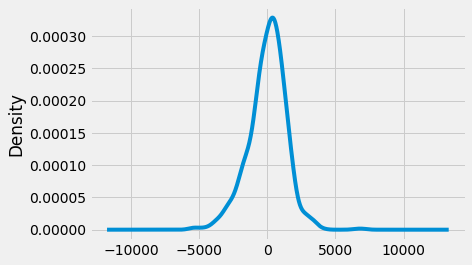

In [122]:
results.resid.plot(kind='kde') 

In [223]:
data['forecast']=results.predict()
dfResults=data.copy()
nDays=60
nTotRows=len(data)
dfResults=pd.concat([dfResults,pd.DataFrame(index=pd.date_range(start='2019-05-01', periods=nDays))],ignore_index=False,axis=0,sort=False)

In [224]:
dfResults['forecast'].iloc[-nDays:]=results.forecast(60).values

C:\Users\P4\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
dfResults[['forecast','Revenue']].plot(figsize=(12,8))

In [226]:
dfResults.tail(20)

,Revenue,forecast
2019-06-10,NaN,-349.220711
2019-06-11,NaN,377.904935
2019-06-12,NaN,131.475167
2019-06-13,NaN,50.499981
2019-06-14,NaN,-251.088675
2019-06-15,NaN,-79.768203
2019-06-16,NaN,-15.984545
2019-06-17,NaN,-572.750907
2019-06-18,NaN,500.891408
2019-06-19,NaN,140.930108


# ANOMALIES-FORECAST

In [242]:
mean_val=np.mean(dfResults['forecast'])
std=np.std(dfResults['forecast'])

In [243]:
dfResults.insert(1,'Control Line',mean_val)

In [244]:
dfResults.insert(2,'Std. Deviation',std)

In [245]:
dfResults['UCL']=dfResults['Control Line']+(dfResults['Std. Deviation']*3)
dfResults['LCL']=dfResults['Control Line']-(dfResults['Std. Deviation']*3)

In [246]:
dfResults

,Revenue,Control Line,Std. Deviation,forecast,UCL,LCL
2016-05-10 08:00:00,NaN,0.670284,970.347515,0.000000,2911.712829,-2910.372262
2016-05-11 08:00:00,NaN,0.670284,970.347515,0.000000,2911.712829,-2910.372262
2016-05-12 08:00:00,-30.986582,0.670284,970.347515,0.000000,2911.712829,-2910.372262
2016-05-13 08:00:00,135.076985,0.670284,970.347515,0.000000,2911.712829,-2910.372262
2016-05-14 08:00:00,165.789566,0.670284,970.347515,0.000000,2911.712829,-2910.372262
2016-05-15 08:00:00,-92.136295,0.670284,970.347515,0.000000,2911.712829,-2910.372262
2016-05-16 08:00:00,-159.564424,0.670284,970.347515,0.000000,2911.712829,-2910.372262
2016-05-17 08:00:00,-144.409084,0.670284,970.347515,0.000000,2911.712829,-2910.372262
2016-05-18 08:00:00,201.626878,0.670284,970.347515,0.000000,2911.712829,-2910.372262
2016-05-19 08:00:00,-188.826359,0.670284,970.347515,0.000000,2911.712829,-2910.372262


In [247]:
dfResults.Revenue.fillna(data.Revenue.mean(),inplace=True)

Text(0.5, 1.0, 'forecast - Control Chart')

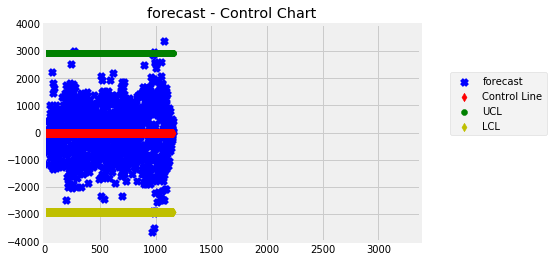

In [252]:
plt.xlim(0,max(dfResults['forecast']))
plt.ylim(-4000,4000)

x1=np.arange(0.0,len(dfResults['forecast']))
y1=dfResults['forecast']

plt.scatter(x=x1,y=dfResults['forecast'], c='b', marker='x',label='forecast')
plt.scatter(x=x1, y=dfResults['Control Line'], c='r', marker='d',label='Control Line')
plt.scatter(x=x1, y=dfResults['UCL'], c='g', label='UCL')
plt.scatter(x=x1, y=dfResults['LCL'], c='y', marker='d', label='LCL')
plt.legend(loc='best',bbox_to_anchor=(1, 0., 0.35, 0.8))
plt.title('forecast - Control Chart')